In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import StringIO
import zipfile
import scipy.stats

In [3]:
db=pd.read_csv("/home/shivani/data_csv/conceptual.csv")

In [4]:
db.head()

,bracket,acc_dp,indicator,controller,pay_more,install_sp,grid
0,2,2,4,4,2,5,6
1,2,2,4,4,2,5,6
2,4,5,6,6,2,5,6
3,7,5,5,6,4,5,6
4,3,2,4,4,6,6,6


In [5]:
db.shape

(173, 7)

In [6]:
lc=db[db.bracket==1].count()+db[db.bracket==2].count()


In [7]:
low_count=lc.bracket
low_count

36

In [8]:
mc=db[db.bracket==3].count()+db[db.bracket==4].count()+db[db.bracket==5].count()

In [9]:
middle_count=mc.bracket
middle_count

70

In [10]:
uc=db[db.bracket==6].count()+db[db.bracket==7].count()

In [11]:
upper_count=uc.bracket
upper_count

67

(-1.1006433414291883,
 1.1135101700129557,
 -1.1231551662514732,
 1.1212655529006783)

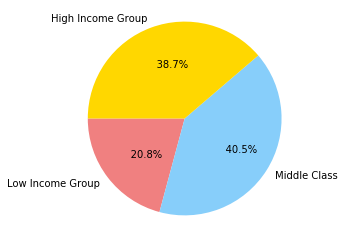

In [12]:
plt.pie([low_count,middle_count,upper_count],colors=['lightcoral','lightskyblue','gold'],labels=['Low Income Group','Middle Class','High Income Group']
       ,autopct='%9.1f%%', shadow=False, startangle=180)
plt.axis('equal')

In [13]:
accp_dp=[db[db.acc_dp==1].acc_dp.count(),db[db.acc_dp==2].acc_dp.count(),db[db.acc_dp==3].acc_dp.count(),db[db.acc_dp==4].acc_dp.count(),
         db[db.acc_dp==5].acc_dp.count(),db[db.acc_dp==6].acc_dp.count()]

In [14]:
accp_dp

[7, 40, 10, 57, 54, 5]

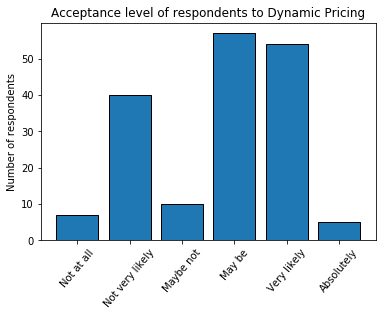

In [15]:
plt.bar(np.arange(6),accp_dp,edgecolor='black')
plt.xticks(np.arange(6),['Not at all','Not very likely','Maybe not','May be','Very likely','Absolutely'],rotation=50)
plt.ylabel("Number of respondents")
plt.title("Acceptance level of respondents to Dynamic Pricing")
plt.show()

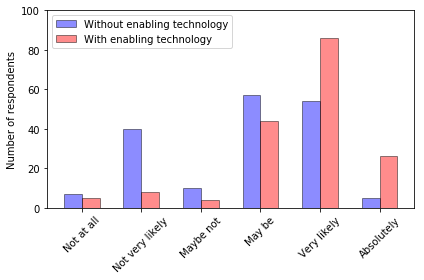

In [16]:
pm=[db[db.pay_more==1].pay_more.count(),db[db.pay_more==2].pay_more.count(),db[db.pay_more==3].pay_more.count(),
    db[db.pay_more==4].pay_more.count(),db[db.pay_more==5].pay_more.count(),db[db.pay_more==6].pay_more.count()]

et=[db[db.indicator==1].indicator.count(),db[db.indicator==2].indicator.count(),db[db.indicator==3].indicator.count(),
    db[db.indicator==4].indicator.count(),db[db.indicator==5].indicator.count(),db[db.indicator==6].indicator.count()]

es=[db[db.install_sp==1].install_sp.count(),db[db.install_sp==2].install_sp.count(),db[db.install_sp==3].install_sp.count(),
    db[db.install_sp==4].install_sp.count(),db[db.install_sp==5].install_sp.count(),db[db.install_sp==6].install_sp.count()]

sg=[db[db.grid==1].grid.count(),db[db.grid==2].grid.count(),db[db.grid==3].grid.count(),
    db[db.grid==4].grid.count(),db[db.grid==5].grid.count(),db[db.grid==6].grid.count()]

fig, ax = plt.subplots()

bar_width=.3

opacity = .45

rects1 = plt.bar(np.arange(6),accp_dp, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Without enabling technology',edgecolor='black')

rects2 = plt.bar(np.arange(6) + bar_width, et, bar_width,
                 alpha=opacity,
                 color='r',
                 label='With enabling technology',edgecolor='black')


plt.ylabel('Number of respondents')

plt.xticks(np.arange(6) + bar_width / 2,['Not at all','Not very likely','Maybe not','May be','Very likely','Absolutely'],rotation=45)
plt.legend()
plt.ylim(0,100)
plt.tight_layout()
plt.show()

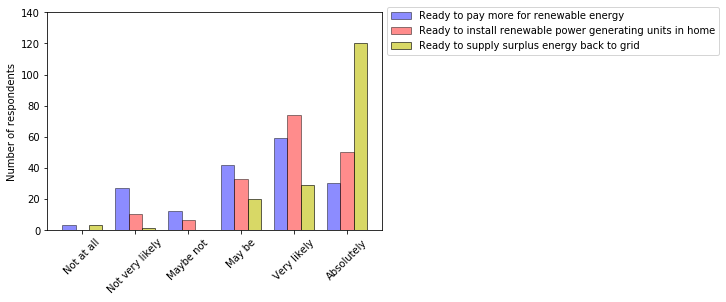

In [17]:
fig, ax=plt.subplots()
bar_width=.5
rects1 = plt.bar(np.arange(0,12,2),pm, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ready to pay more for renewable energy',edgecolor='black')

rects2 = plt.bar(np.arange(0,12,2) + bar_width, es, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Ready to install renewable power generating units in home',edgecolor='black')
rects3 = plt.bar(np.arange(0,12,2)+2*bar_width,sg, bar_width,
                 alpha=.6,
                 color='y',
                 label='Ready to supply surplus energy back to grid',edgecolor='black')
plt.legend(bbox_to_anchor=(1.0,1.05))
plt.ylim(0,140)
plt.xticks(np.arange(0,12,2) + bar_width ,['Not at all','Not very likely','Maybe not','May be','Very likely','Absolutely'],rotation=45)
plt.ylabel("Number of respondents")

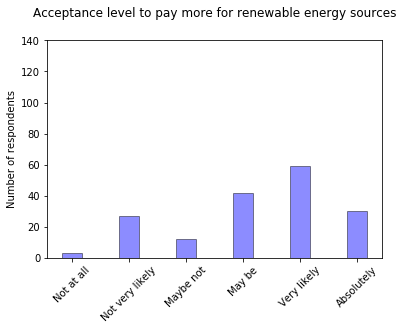

In [18]:
plt.bar(np.arange(6),pm, .35,
                 alpha=opacity,
                 color='b',edgecolor='black')
plt.ylim(0,140)
plt.xticks(np.arange(6),['Not at all','Not very likely','Maybe not','May be','Very likely','Absolutely'],rotation=45)
plt.title("Acceptance level to pay more for renewable energy sources",y=1.08)
plt.ylabel("Number of respondents")

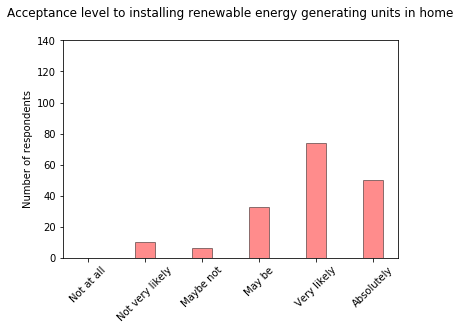

In [19]:
plt.bar(np.arange(6), es, .35,
                 alpha=opacity,
                 color='r',edgecolor='black')
plt.ylim(0,140)
plt.xticks(np.arange(6) ,['Not at all','Not very likely','Maybe not','May be','Very likely','Absolutely'],rotation=45)
plt.title("Acceptance level to installing renewable energy generating units in home",y=1.08)
plt.ylabel("Number of respondents")

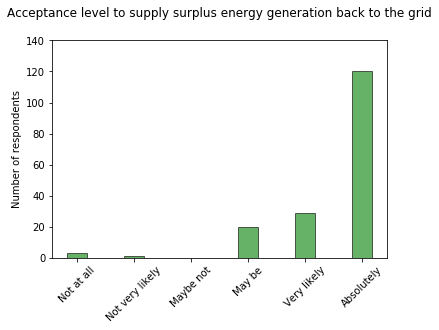

In [20]:
rects3 = plt.bar(np.arange(6),sg, .35,
                 alpha=.6,
                 color='g',edgecolor='black')
plt.xticks(np.arange(6) ,['Not at all','Not very likely','Maybe not','May be','Very likely','Absolutely'],rotation=45)
plt.title("Acceptance level to supply surplus energy generation back to the grid",y=1.08)
plt.ylim(0,140)
plt.ylabel("Number of respondents")

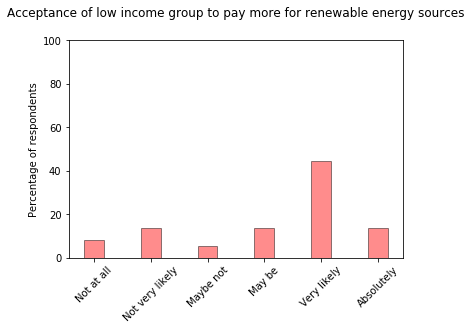

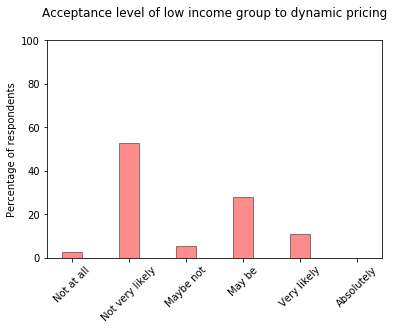

In [21]:
db_low=db[(db.bracket==1) | (db.bracket==2)]
pm_low=[db_low[db_low.pay_more==1].pay_more.count(),db_low[db_low.pay_more==2].pay_more.count(),
        db_low[db_low.pay_more==3].pay_more.count(),
    db_low[db_low.pay_more==4].pay_more.count(),db_low[db_low.pay_more==5].pay_more.count(),
        db_low[db_low.pay_more==6].pay_more.count()]

accp_dp_low=[db_low[db_low.acc_dp==1].acc_dp.count(),db_low[db_low.acc_dp==2].acc_dp.count(),
         db_low[db_low.acc_dp==3].acc_dp.count(),db_low[db_low.acc_dp==4].acc_dp.count(),
         db_low[db_low.acc_dp==5].acc_dp.count(),db_low[db_low.acc_dp==6].acc_dp.count()]

pm_low=[x/36.0*100 for x in pm_low]
accp_dp_low=[x/36.0*100 for x in accp_dp_low]
plt.bar(np.arange(6), pm_low, .35,
                 alpha=opacity,
                 color='r',edgecolor='black')

plt.ylim(0,100)
plt.xticks(np.arange(6) ,['Not at all','Not very likely','Maybe not','May be','Very likely','Absolutely'],rotation=45)
plt.title("Acceptance of low income group to pay more for renewable energy sources",y=1.08)
plt.ylabel("Percentage of respondents")
plt.show()
plt.bar(np.arange(6), accp_dp_low, .35,
                 alpha=opacity,
                 color='r',edgecolor='black')
plt.ylim(0,100)
plt.xticks(np.arange(6) ,['Not at all','Not very likely','Maybe not','May be','Very likely','Absolutely'],rotation=45)
plt.title("Acceptance level of low income group to dynamic pricing",y=1.08)
plt.ylabel("Percentage of respondents")

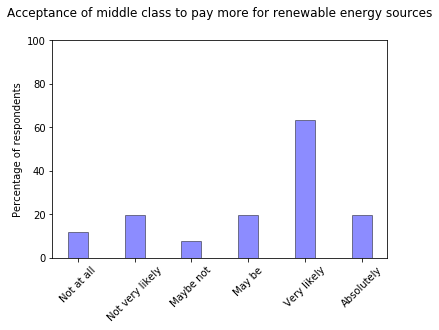

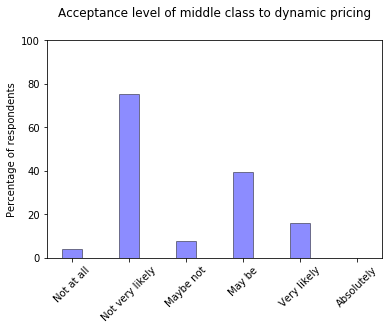

In [24]:
db_mid=db[(db.bracket==4) | (db.bracket==6) | (db.bracket==5)]
pm_mid=[db_mid[db_mid.pay_more==1].pay_more.count(),db_mid[db_mid.pay_more==2].pay_more.count(),
        db_mid[db_mid.pay_more==3].pay_more.count(),
    db_mid[db_mid.pay_more==4].pay_more.count(),db_mid[db_mid.pay_more==5].pay_more.count(),
        db_mid[db_mid.pay_more==6].pay_more.count()]

accp_dp_mid=[db_mid[db_mid.acc_dp==1].acc_dp.count(),db_mid[db_mid.acc_dp==2].acc_dp.count(),
         db_mid[db_mid.acc_dp==3].acc_dp.count(),db_mid[db_mid.acc_dp==4].acc_dp.count(),
         db_mid[db_mid.acc_dp==5].acc_dp.count(),db_mid[db_mid.acc_dp==6].acc_dp.count()]
pm_mid=[x/70.0*100 for x in pm_low]
accp_dp_mid=[x/70.0*100 for x in accp_dp_low]

plt.bar(np.arange(6), pm_mid, .35,
                 alpha=opacity,
                 color='b',edgecolor='black')
plt.ylim(0,100)
plt.xticks(np.arange(6) ,['Not at all','Not very likely','Maybe not','May be','Very likely','Absolutely'],rotation=45)
plt.title("Acceptance of middle class to pay more for renewable energy sources",y=1.08)
plt.ylabel("Percentage of respondents")
plt.show()
plt.bar(np.arange(6), accp_dp_mid, .35,
                 alpha=opacity,
                 color='b',edgecolor='black')
plt.ylim(0,100)
plt.xticks(np.arange(6) ,['Not at all','Not very likely','Maybe not','May be','Very likely','Absolutely'],rotation=45)
plt.title("Acceptance level of middle class to dynamic pricing",y=1.08)
plt.ylabel("Percentage of respondents")

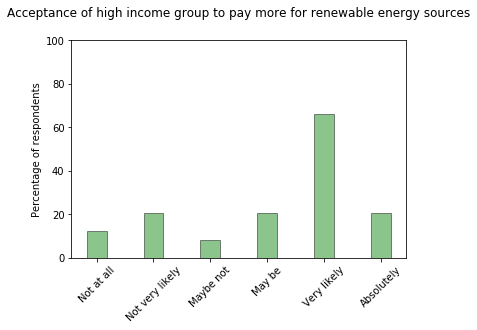

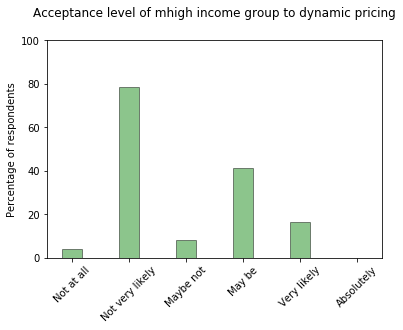

In [25]:
db_high=db[(db.bracket==6) | (db.bracket==7)]
pm_high=[db_high[db_high.pay_more==1].pay_more.count(),db_high[db_high.pay_more==2].pay_more.count(),
        db_high[db_high.pay_more==3].pay_more.count(),
    db_high[db_high.pay_more==4].pay_more.count(),db_high[db_high.pay_more==5].pay_more.count(),
        db_high[db_high.pay_more==6].pay_more.count()]

accp_dp_high=[db_high[db_high.acc_dp==1].acc_dp.count(),db_high[db_high.acc_dp==2].acc_dp.count(),
         db_high[db_high.acc_dp==3].acc_dp.count(),db_high[db_high.acc_dp==4].acc_dp.count(),
         db_high[db_high.acc_dp==5].acc_dp.count(),db_high[db_high.acc_dp==6].acc_dp.count()]

pm_high=[x/67.0*100 for x in pm_low]
accp_dp_high=[x/67.0*100 for x in accp_dp_low]
plt.bar(np.arange(6), pm_high, .35,
                 alpha=opacity,
                 color='g',edgecolor='black')
plt.ylim(0,100)
plt.xticks(np.arange(6) ,['Not at all','Not very likely','Maybe not','May be','Very likely','Absolutely'],rotation=45)
plt.title("Acceptance of high income group to pay more for renewable energy sources",y=1.08)
plt.ylabel("Percentage of respondents")
plt.show()
plt.bar(np.arange(6), accp_dp_high, .35,
                 alpha=opacity,
                 color='g',edgecolor='black')
plt.ylim(0,100)
plt.xticks(np.arange(6) ,['Not at all','Not very likely','Maybe not','May be','Very likely','Absolutely'],rotation=45)
plt.title("Acceptance level of mhigh income group to dynamic pricing",y=1.08)
plt.ylabel("Percentage of respondents")